<a href="https://colab.research.google.com/github/Nniikkoollaass/data-science-modul-5-HW/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import requests
from io import StringIO
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt

In [ ]:
# дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com.4
# Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук

In [11]:
# Ініціалізуємо об'єкт API Kaggle
api = KaggleApi()
# Авторизуємося через API-ключ
api.authenticate()

# Завантажуємо файли для даного датасету
api.dataset_download_files('sootersaalu/amazon-top-50-bestselling-books-2009-2019')

# Розархівовуємо завантажений архів у поточну директорію
import zipfile
with zipfile.ZipFile('amazon-top-50-bestselling-books-2009-2019.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [12]:
# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
# Читаємо CSV файл
df = pd.read_csv('bestsellers with categories.csv')

# Виводимо перші декілька рядків даних
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [13]:
# Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

In [14]:
# Про скільки книг зберігає дані датасет?
# Отримуємо кількість книг у датасеті
num_books = df.shape[0]

# Виводимо результат
print("Відповідь:", num_books)

Відповідь: 550


In [15]:
# Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style)
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
# Виводимо датасет
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [ ]:
# Первинне дослідження даних

In [16]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)4
# Обчислюємо кількість пропущених значень у кожному стовпці
missing_values = df.isna().sum()

# Виводимо кількість пропущених значень у кожному стовпці
missing_values

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
# Чи є в якихось змінних пропуски? (Так / ні)
# Відповідь: ні

In [17]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
# Отримуємо унікальні значення в колонці "genre"
unique_genres = df['genre'].unique()

# Виводимо унікальні значення
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

In [ ]:
# Які є унікальні жанри?
# Відповідь: 'Non Fiction' 'Fiction'

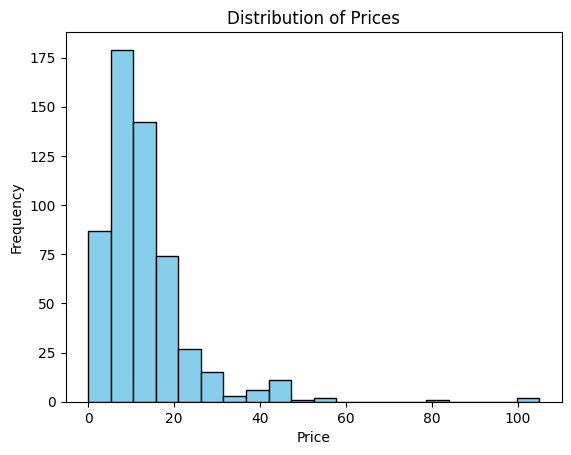

In [18]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
# Побудова гістограми розподілу цін
df['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

# Додавання заголовка та міток осей
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Відображення графіка
plt.show()

In [19]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
# Визначаємо максимальну ціну
max_price = df['price'].max()

# Визначаємо мінімальну ціну
min_price = df['price'].min()

# Визначаємо середню ціну
mean_price = df['price'].mean()

# Визначаємо медіанну ціну
median_price = df['price'].median()

# Виводимо результати
print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
# Максимальна ціна?
# Відповідь: 105

In [ ]:
# Мінімальна ціна?
# Відповідь: 0

In [ ]:
# Середня ціна?
# Відповідь: 13.1

In [ ]:
# Медіанна ціна?
# Відповідь: 11.0

In [ ]:
# Пошук та сортування даних

In [20]:
# Який рейтинг у датасеті найвищий?
# Отримуємо найвищий рейтинг у датасеті
max_rating = df['user_rating'].max()

# Виводимо результат
print("Відповідь:", max_rating)

Відповідь: 4.9


In [21]:
# Скільки книг мають такий рейтинг?
# Визначаємо кількість книг з рейтингом 4.9
num_books_with_49_rating = df[df['user_rating'] == 4.9].shape[0]

# Виводимо результат
print("Відповідь:", num_books_with_49_rating)

Відповідь: 52


In [24]:
# Яка книга має найбільше відгуків?
# Знаходимо індекс книги з найбільшою кількістю відгуків
index_of_most_reviews = df['reviews'].idxmax()

# Отримуємо дані про книгу з найбільшою кількістю відгуків
book_with_most_reviews = df.loc[index_of_most_reviews]

# Виводимо дані про книгу з найбільшою кількістю відгуків
print("Відповідь:")
book_with_most_reviews

Відповідь:


name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [25]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Фільтруємо дані за роком видання 2015
df_2015 = df[df['year'] == 2015]

# Знаходимо книгу з максимальною ціною у відфільтрованому датафреймі
most_expensive_book_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]

# Виводимо дані про найдорожчу книгу у 2015 році
print("Відповідь:")
most_expensive_book_2015

Відповідь:


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [26]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
# Фільтруємо дані за роком видання 2010 та жанром "Fiction"
fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]

# Отримуємо кількість книг, що задовольняють умовам
num_fiction_books_2010 = fiction_books_2010.shape[0]

# Виводимо результат
print("Відповідь:", num_fiction_books_2010)

Відповідь: 20


In [27]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Фільтруємо дані за роком видання 2010 та 2011 та рейтингом 4.9
books_2010_2011_rating_49 = df[((df['year'] == 2010) | (df['year'] == 2011)) & (df['user_rating'] == 4.9)]

# Отримуємо кількість книг, що задовольняють умовам
num_books_2010_2011_rating_49 = books_2010_2011_rating_49.shape[0]

# Виводимо результат
print("Відповідь:", num_books_2010_2011_rating_49)

Відповідь: 1


In [28]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги,
# які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
# Фільтруємо дані за роком видання 2015 та ціною менше 8 доларів
books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)]

# Відсортовуємо дані за зростанням ціни
sorted_books_2015_under_8 = books_2015_under_8.sort_values(by='price')

# Виводимо результат
print("Відповідь:")
sorted_books_2015_under_8

Відповідь:


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [29]:
# Яка книга остання у відсортованому списку? Відповідь:
# Остання книга у відсортованому списку
last_book = sorted_books_2015_under_8.iloc[-1]

# Виводимо результат
print("Відповідь:")
last_book

Відповідь:


name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

In [ ]:
# Агрегування даних та з'єднання таблиць

In [30]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min).
# Не беріть усі стовпці, виберіть тільки потрібні вам
# Групуємо дані за жанром та обчислюємо мінімальну та максимальну ціну для кожного жанру
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max'])

# Виводимо результат
print("Мінімальна та максимальна ціна для кожного з жанрів:")
genre_price_stats

Мінімальна та максимальна ціна для кожного з жанрів:


,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [31]:
# Максимальна ціна для жанру Fiction:
# Отримуємо максимальну ціну для жанру "Fiction"
max_price_fiction = genre_price_stats.loc['Fiction', 'max']

# Виводимо результат
print("Відповідь:", max_price_fiction)

Відповідь: 82


In [32]:
# Мінімальна ціна для жанру Fiction:
# Отримуємо мінімальну ціну для жанру "Fiction"
min_price_fiction = genre_price_stats.loc['Fiction', 'min']

# Виводимо результат
print("Відповідь:", min_price_fiction)

Відповідь: 0


In [33]:
# Максимальна ціна для жанру Non Fiction:
# Отримуємо максимальну ціну для жанру "Non Fiction"
max_price_non_fiction = genre_price_stats.loc['Non Fiction', 'max']

# Виводимо результат
print("Відповідь:", max_price_non_fiction)

Відповідь: 105


In [34]:
# Мінімальна ціна для жанру Non Fiction:
# Отримуємо мінімальну ціну для жанру "Non Fiction"
min_price_non_fiction = genre_price_stats.loc['Non Fiction', 'min']

# Виводимо результат
print("Відповідь:", min_price_non_fiction)

Відповідь: 0


In [35]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
# Групуємо дані за автором та обчислюємо кількість книг для кожного автора
author_book_counts = df.groupby('author')['name'].agg('count').reset_index()

# Перейменовуємо стовпець для зручності
author_book_counts = author_book_counts.rename(columns={'name': 'books'})

# Виводимо результат
print("Кількість книг для кожного з авторів:")
author_book_counts

Кількість книг для кожного з авторів:


,author,books
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [36]:
# Якої розмірності вийшла таблиця?

# Виводимо результат
print("Відповідь:", author_book_counts.shape)

Відповідь: (248, 2)


In [37]:
# Який автор має найбільше книг? Відповідь:
# Знаходимо індекс автора з найбільшою кількістю книг
index_of_most_books_author = author_book_counts['books'].idxmax()

# Отримуємо дані про автора з найбільшою кількістю книг
most_books_author = author_book_counts.loc[index_of_most_books_author]

# Виводимо результат
print("Відповідь:")
most_books_author

Відповідь:


author    Jeff Kinney
books              12
Name: 120, dtype: object

In [38]:
# Скільки книг цього автора? :
print("Відповідь:", most_books_author['books'])

Відповідь: 12


In [39]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
# Створюємо другий датафрейм, що містить середній рейтинг для кожного автора
author_avg_rating = df.groupby('author')['user_rating'].agg('mean').reset_index()

# Перейменовуємо стовпець для зручності
author_avg_rating = author_avg_rating.rename(columns={'user_rating': 'average_rating'})

# Виводимо результат
print("Другий датафрейм з середнім рейтингом для кожного автора:")
author_avg_rating

Другий датафрейм з середнім рейтингом для кожного автора:


,author,average_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [40]:
# У якого автора середній рейтинг мінімальний? Відповідь:
# Знаходимо індекс автора з мінімальним середнім рейтингом
index_of_min_avg_rating_author = author_avg_rating['average_rating'].idxmin()

# Отримуємо дані про автора з мінімальним середнім рейтингом
min_avg_rating_author = author_avg_rating.loc[index_of_min_avg_rating_author]

# Виводимо результат
print("Відповідь:")
min_avg_rating_author

Відповідь:


author            Donna Tartt
average_rating            3.9
Name: 71, dtype: object

In [41]:
# Який у цього автора середній рейтинг? :
# Отримуємо середній рейтинг для цього автора
avg_rating_min_author = min_avg_rating_author['average_rating']

# Виводимо результат
print("Відповідь:", avg_rating_min_author)

Відповідь: 3.9


In [42]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
# З'єднуємо два датафрейми за допомогою функції concat
merged_df = pd.concat([author_book_counts.set_index('author'), author_avg_rating.set_index('author')], axis=1)

# Виводимо результат
print("З'єднаний датафрейм:")
merged_df

З'єднаний датафрейм:


,books,average_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


In [43]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
# Відсортовуємо датафрейм за зростаючою кількістю книг та зростаючим рейтингом
sorted_df = merged_df.sort_values(by=['books', 'average_rating'], ascending=[True, True])

# Виводимо результат
print("Відсортований датафрейм:")
sorted_df

Відсортований датафрейм:


,books,average_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [44]:
# Який автор перший у списку?
# Отримуємо першого автора у відсортованому датафреймі
first_author = sorted_df.iloc[0]

# Виводимо результат
print("Відповідь:")
first_author.name

Відповідь:


'Muriel Barbery'

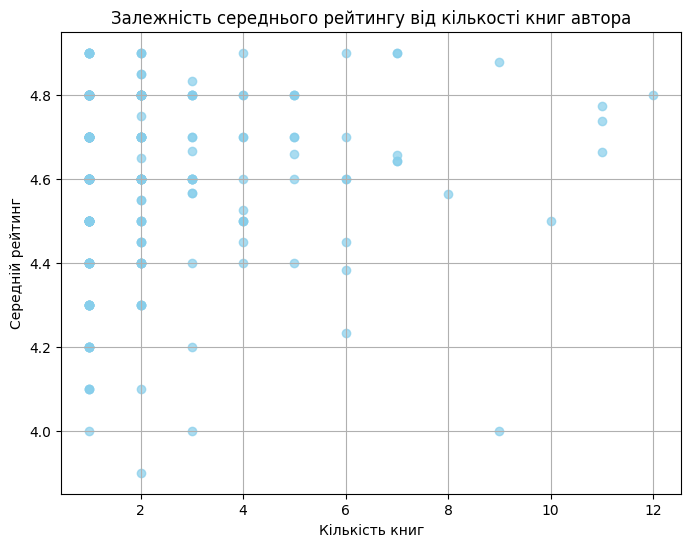

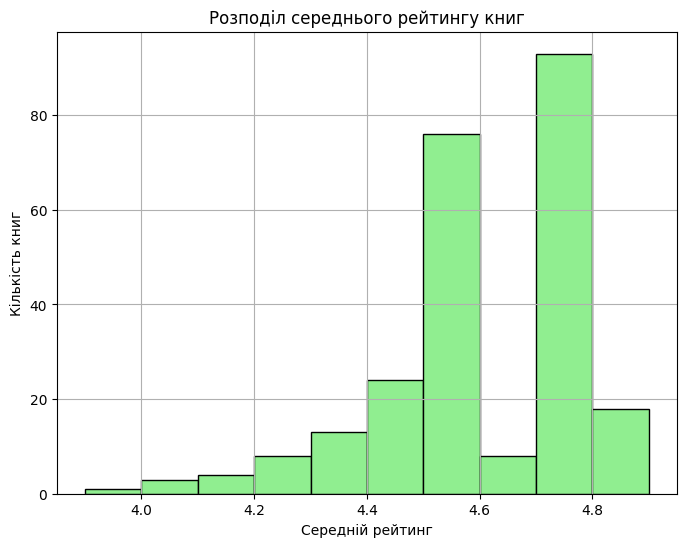

<Figure size 1000x600 with 0 Axes>

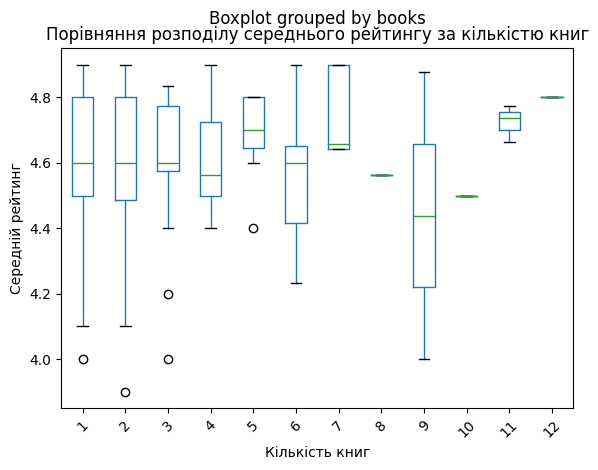

In [45]:
# Графік розсіювання
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['books'], merged_df['average_rating'], color='skyblue', alpha=0.7)
plt.title('Залежність середнього рейтингу від кількості книг автора')
plt.xlabel('Кількість книг')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()

# Гістограма
plt.figure(figsize=(8, 6))
plt.hist(merged_df['average_rating'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Розподіл середнього рейтингу книг')
plt.xlabel('Середній рейтинг')
plt.ylabel('Кількість книг')
plt.grid(True)
plt.show()

# Ящик з вусами
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='average_rating', by='books', grid=False)
plt.title('Порівняння розподілу середнього рейтингу за кількістю книг')
plt.xlabel('Кількість книг')
plt.ylabel('Середній рейтинг')
plt.xticks(rotation=45)
plt.show()